# Data Validation

The original dataset contains 15000 rows and 8 columns.

*  The **customer_id** column contains unique identifiers for each customer. _No changes required._ The column is considered as index column. 
* The **week** column contains integer values from 1 to 6 corresponding to the week since product launch. _No changes required._
* The **sales_method** column contains strings of 5 different values _(Email, Call, Email + Call, em + call, email)_ corresponding to each method of sales (email, call, or both). The column should only contain 3 unique values: _Email, Call, Email + Call._ The string value _em + call_ was replaced by _Email + Call_, _email_ was replaced by _Email_ throughout the column.
* The **nb_sold** column consists of integer number of products sold. _No changes required._
* The **revenue** column contains float values representing sales revenue. The column had _1074 missing values_. Missing data were replaced by the mean revenue for each state.
* The **years_as_customer** column represents the number of years customer has been buying from the store. The column had _2 rows with invalid values_. Since the company was founded in 1984, the maximum number of years we can cooperate with any client is 41 years. Two rows had values 47 and 63 which is not possible. Invalid values were replaced by the closest possible number 41.
* The **nb_site_visits** column represents the number of times the customer has visited company`s website in the last 6 months. _No changes required._
* The **state** column contains strings of 50 unique values corresponding to each state. _No changes required._



In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sales = pd.read_csv('product_sales.csv', index_col='customer_id')

In [110]:
sales.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
customer_id,,,,,,,
2e72d641-95ac-497b-bbf8-4861764a7097,2,Email,10,NaN,0,24,Arizona
3998a98d-70f5-44f7-942e-789bb8ad2fe7,6,Email + Call,15,225.47,1,28,Kansas
d1de9884-8059-4065-b10f-86eef57e4a44,5,Call,11,52.55,6,26,Wisconsin
78aa75a4-ffeb-4817-b1d0-2f030783c5d7,4,Email,11,NaN,3,25,Indiana
10e6d446-10a5-42e5-8210-1b5438f70922,3,Email,9,90.49,0,28,Illinois


Checking the types of the columns and missing values

In [111]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 2e72d641-95ac-497b-bbf8-4861764a7097 to 4e077235-7c17-4054-9997-7a890336a214
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   nb_sold            15000 non-null  int64  
 3   revenue            13926 non-null  float64
 4   years_as_customer  15000 non-null  int64  
 5   nb_site_visits     15000 non-null  int64  
 6   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 937.5+ KB


In [112]:
sales['week'].value_counts()

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

In [113]:
sales['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [114]:
sales['sales_method'] = sales['sales_method'].replace({'email': 'Email', 'em + call': 'Email + Call'})

In [115]:
sales['nb_sold'].value_counts().sort_index()

7      698
8     1941
9     3535
10    3677
11    2439
12    1088
13     939
14      97
15     555
16      31
Name: nb_sold, dtype: int64

In [116]:
revenue_dict = sales.groupby('state')['revenue'].mean().round(2).to_dict()
print(revenue_dict)
sales['revenue'] = sales['revenue'].fillna(sales['state'].map(revenue_dict))
sales.head()

{'Alabama': 96.95, 'Alaska': 91.43, 'Arizona': 92.21, 'Arkansas': 91.49, 'California': 92.61, 'Colorado': 92.2, 'Connecticut': 97.92, 'Delaware': 102.99, 'Florida': 94.01, 'Georgia': 94.41, 'Hawaii': 97.4, 'Idaho': 102.11, 'Illinois': 91.41, 'Indiana': 93.65, 'Iowa': 90.77, 'Kansas': 92.57, 'Kentucky': 93.87, 'Louisiana': 94.9, 'Maine': 88.65, 'Maryland': 93.02, 'Massachusetts': 93.43, 'Michigan': 95.33, 'Minnesota': 93.65, 'Mississippi': 100.37, 'Missouri': 90.42, 'Montana': 83.38, 'Nebraska': 98.15, 'Nevada': 98.84, 'New Hampshire': 92.45, 'New Jersey': 90.86, 'New Mexico': 97.94, 'New York': 92.59, 'North Carolina': 89.34, 'North Dakota': 104.08, 'Ohio': 92.33, 'Oklahoma': 96.2, 'Oregon': 98.47, 'Pennsylvania': 93.3, 'Rhode Island': 96.3, 'South Carolina': 100.21, 'South Dakota': 104.76, 'Tennessee': 89.92, 'Texas': 95.85, 'Utah': 99.48, 'Vermont': 101.76, 'Virginia': 97.54, 'Washington': 98.38, 'West Virginia': 100.03, 'Wisconsin': 93.57, 'Wyoming': 95.99}


,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
customer_id,,,,,,,
2e72d641-95ac-497b-bbf8-4861764a7097,2,Email,10,92.21,0,24,Arizona
3998a98d-70f5-44f7-942e-789bb8ad2fe7,6,Email + Call,15,225.47,1,28,Kansas
d1de9884-8059-4065-b10f-86eef57e4a44,5,Call,11,52.55,6,26,Wisconsin
78aa75a4-ffeb-4817-b1d0-2f030783c5d7,4,Email,11,93.65,3,25,Indiana
10e6d446-10a5-42e5-8210-1b5438f70922,3,Email,9,90.49,0,28,Illinois


In [117]:
sales['years_as_customer'].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
47       1
63       1
Name: years_as_customer, dtype: int64

In [118]:
sales.loc[sales['years_as_customer'] > 41, 'years_as_customer'] = 41
sales['years_as_customer'].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
41       2
Name: years_as_customer, dtype: int64

In [119]:
sales['nb_site_visits'].value_counts().sort_index()

12       1
13       4
14       7
15      31
16      80
17     113
18     217
19     426
20     600
21     908
22    1200
23    1478
24    1601
25    1688
26    1645
27    1440
28    1175
29     893
30     654
31     371
32     250
33     114
34      51
35      33
36      14
37       5
41       1
Name: nb_site_visits, dtype: int64

In [120]:
sales['state'].value_counts()

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

# EDA

### 1. Print descriptive statistics 

In [121]:
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.928705,4.964067,24.990867
std,1.656420,1.812213,45.711622,5.028153,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,53.040000,1.000000,23.000000
50%,3.000000,10.000000,91.200000,3.000000,25.000000
75%,5.000000,11.000000,106.070000,7.000000,27.000000
max,6.000000,16.000000,238.320000,41.000000,41.000000


### 2. Number of sales for each method

A bar chart comparing the number of customers reached by _Email, Call, and Email + Call_. Shows _Email_ is the most common, but _Email + Call_ might generate higher revenue.

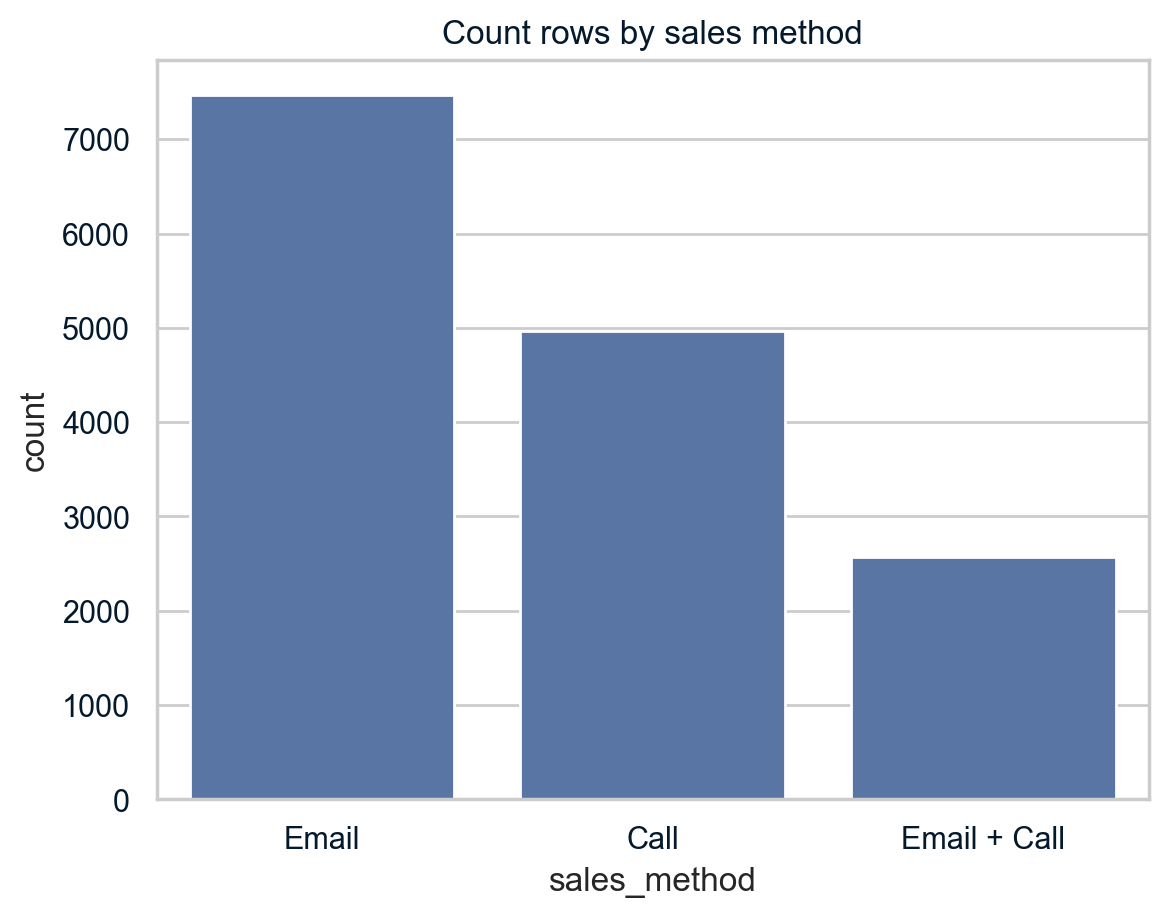

In [122]:
sns.set(style='whitegrid')
sns.countplot(x='sales_method', data=sales, order=['Email', 'Call', 'Email + Call'])
plt.title("Count rows by sales method")
plt.show()

### 3. Overall distribution of revenue

 A histogram showing most transactions cluster at lower revenue values, with a long tail of high-value sales.

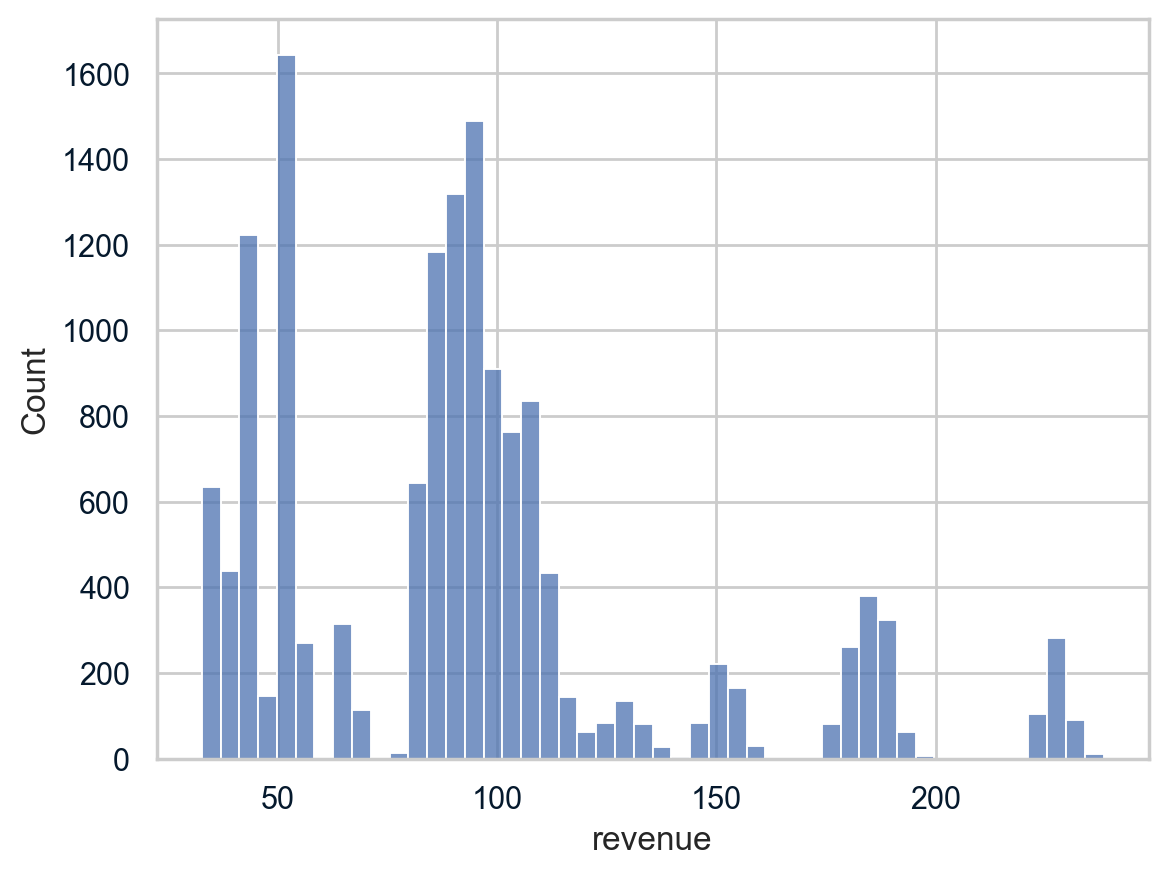

In [123]:
sns.histplot(x='revenue', data=sales)
plt.show()

### 4. Discriptive statistics of revenue for each state

In [124]:
sales.groupby('state')['revenue'].agg(['mean', 'min', 'max', 'median'])

,mean,min,max,median
state,,,,
Alabama,96.949813,32.59,229.21,93.010
Alaska,91.428500,39.50,229.13,91.430
Arizona,92.207601,33.18,230.23,90.550
Arkansas,91.486667,33.89,230.62,87.660
California,92.605780,32.67,237.19,91.560
Colorado,92.196000,34.64,229.07,92.200
Connecticut,97.920056,33.23,233.03,96.020
Delaware,102.992647,36.13,225.83,102.990
Florida,94.009436,33.32,236.75,91.420


### 5. Distribution of revenue by sales method

Separate histograms for each sales method showing that _Email + Call_ tends to have higher-value sales.

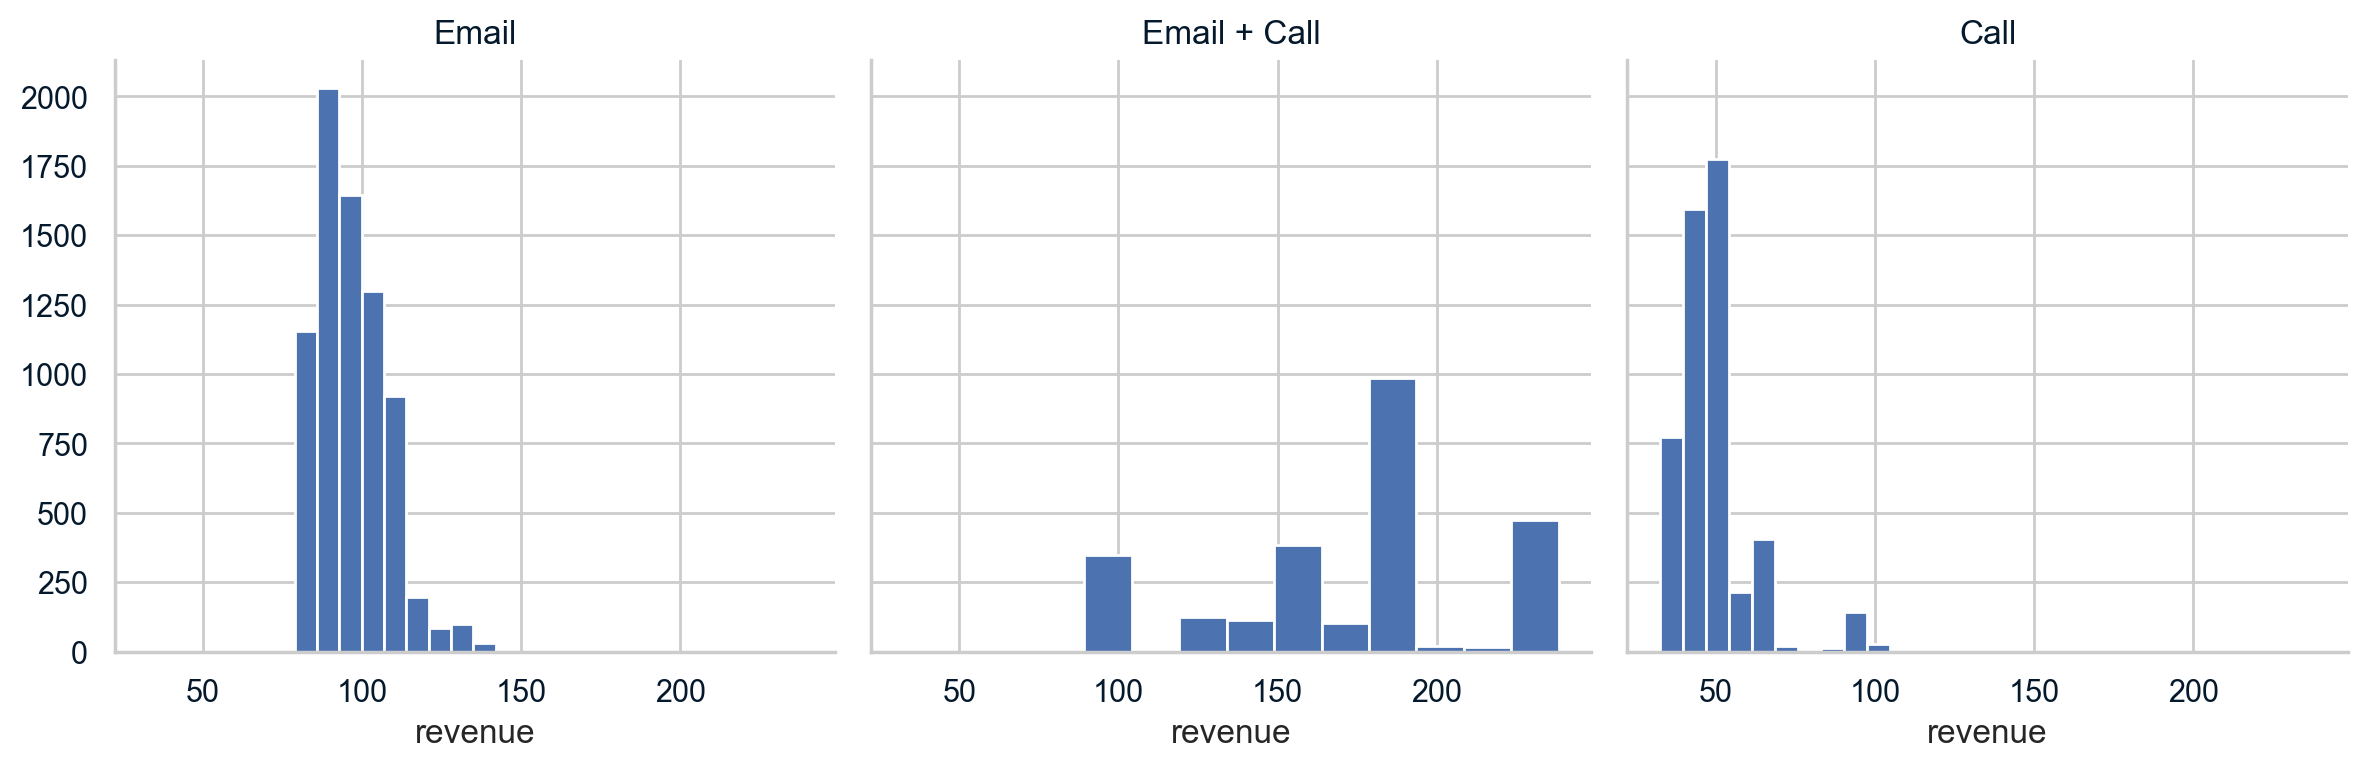

In [125]:
g = sns.FacetGrid(sales, col='sales_method', col_wrap=3, height=4)
g.map(plt.hist, 'revenue')
g.set_titles("{col_name}")
plt.show()

### 6. Revenue over weeks for each sale method

A line plot showing revenue trends over the 6 weeks post-launch. _Email + Call_ generally trends higher than the others.

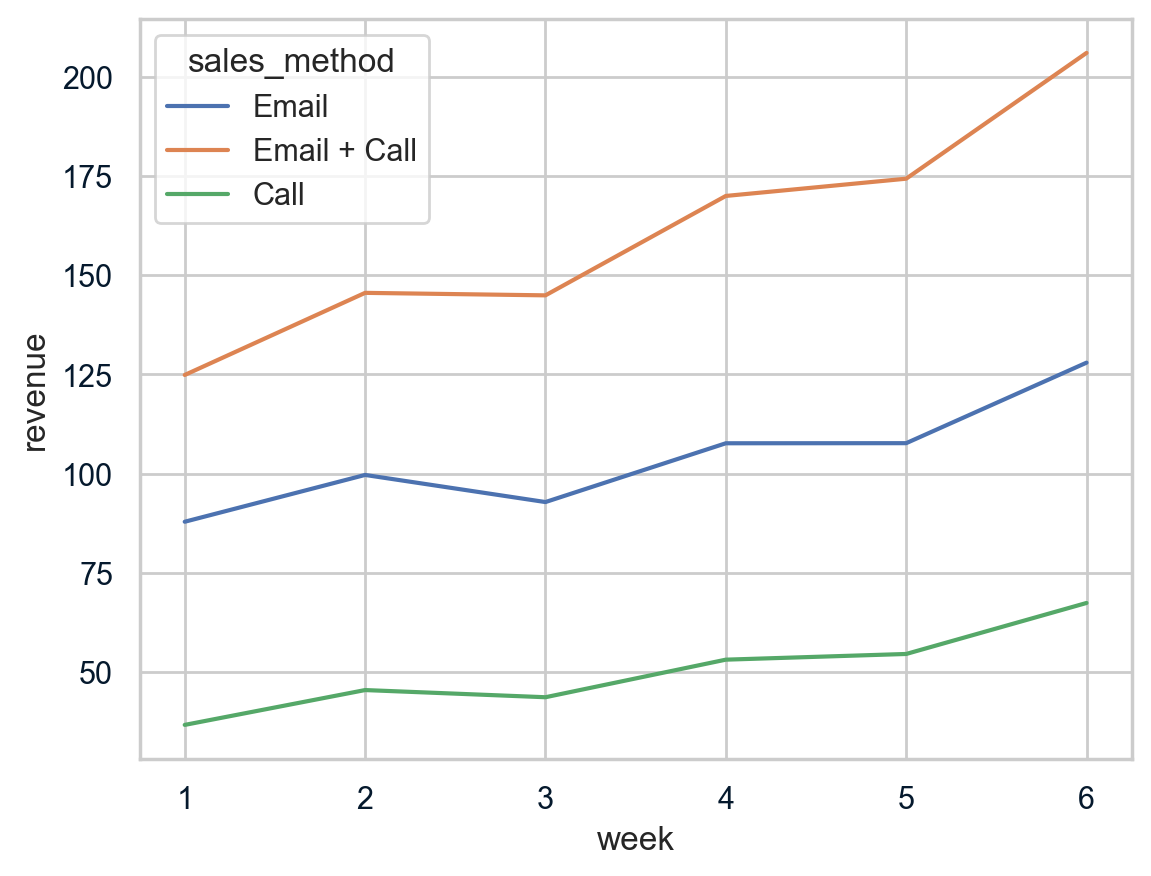

In [126]:
sns.lineplot(x='week', y='revenue', data=sales,ci=None, hue='sales_method')
plt.show()

### 7. Revenue by number of items sold for each sale method

A scatter plot showing a strong positive correlation: more items sold → higher revenue, regardless of method.

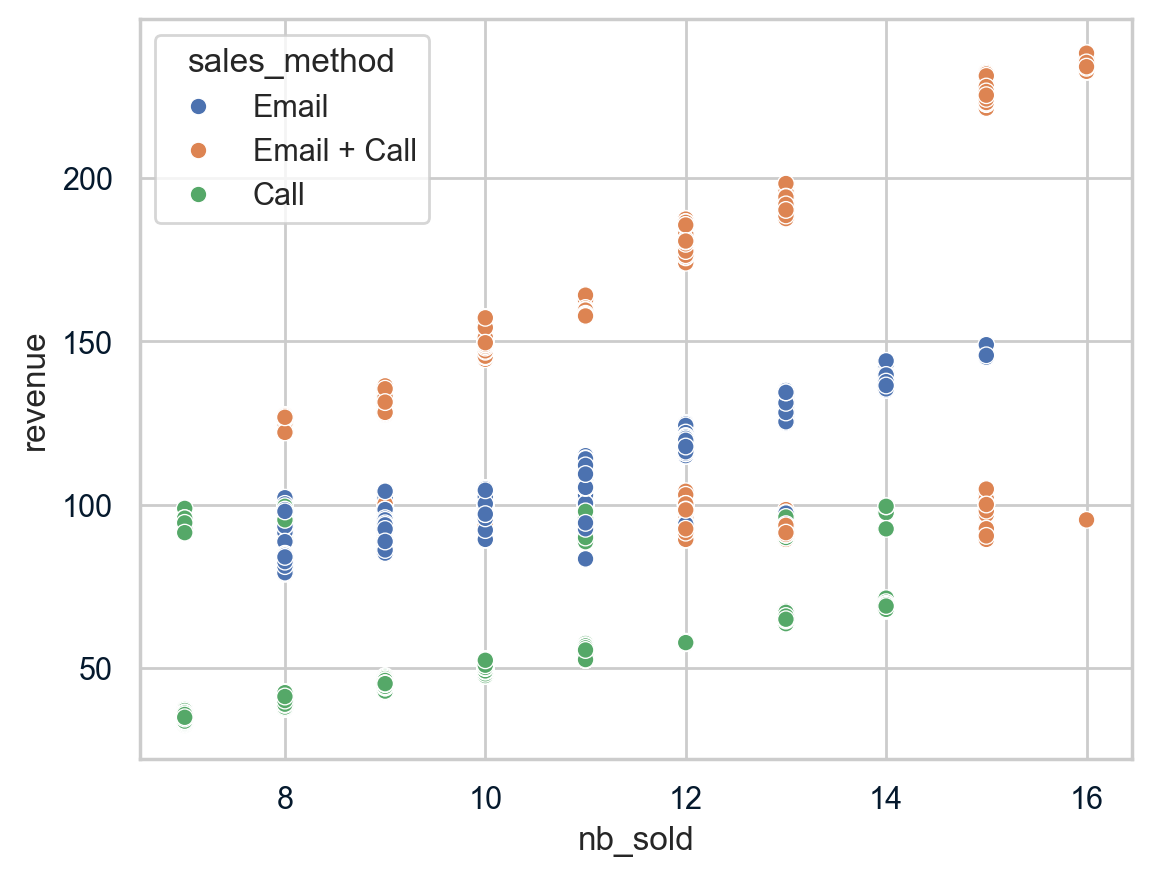

In [127]:
sns.scatterplot(x='nb_sold', y='revenue', data=sales, hue='sales_method', )
plt.show()

### 8. Correlation between columns

A heatmap of correlations between all numeric columns (and dummy-encoded sales methods), showing strongest positive link between _nb_sold_ and _revenue_.

In [128]:
df=pd.get_dummies(sales, columns=['sales_method'])
df.head()

,week,nb_sold,revenue,years_as_customer,nb_site_visits,state,sales_method_Call,sales_method_Email,sales_method_Email + Call
customer_id,,,,,,,,,
2e72d641-95ac-497b-bbf8-4861764a7097,2,10,92.21,0,24,Arizona,0,1,0
3998a98d-70f5-44f7-942e-789bb8ad2fe7,6,15,225.47,1,28,Kansas,0,0,1
d1de9884-8059-4065-b10f-86eef57e4a44,5,11,52.55,6,26,Wisconsin,1,0,0
78aa75a4-ffeb-4817-b1d0-2f030783c5d7,4,11,93.65,3,25,Indiana,0,1,0
10e6d446-10a5-42e5-8210-1b5438f70922,3,9,90.49,0,28,Illinois,0,1,0


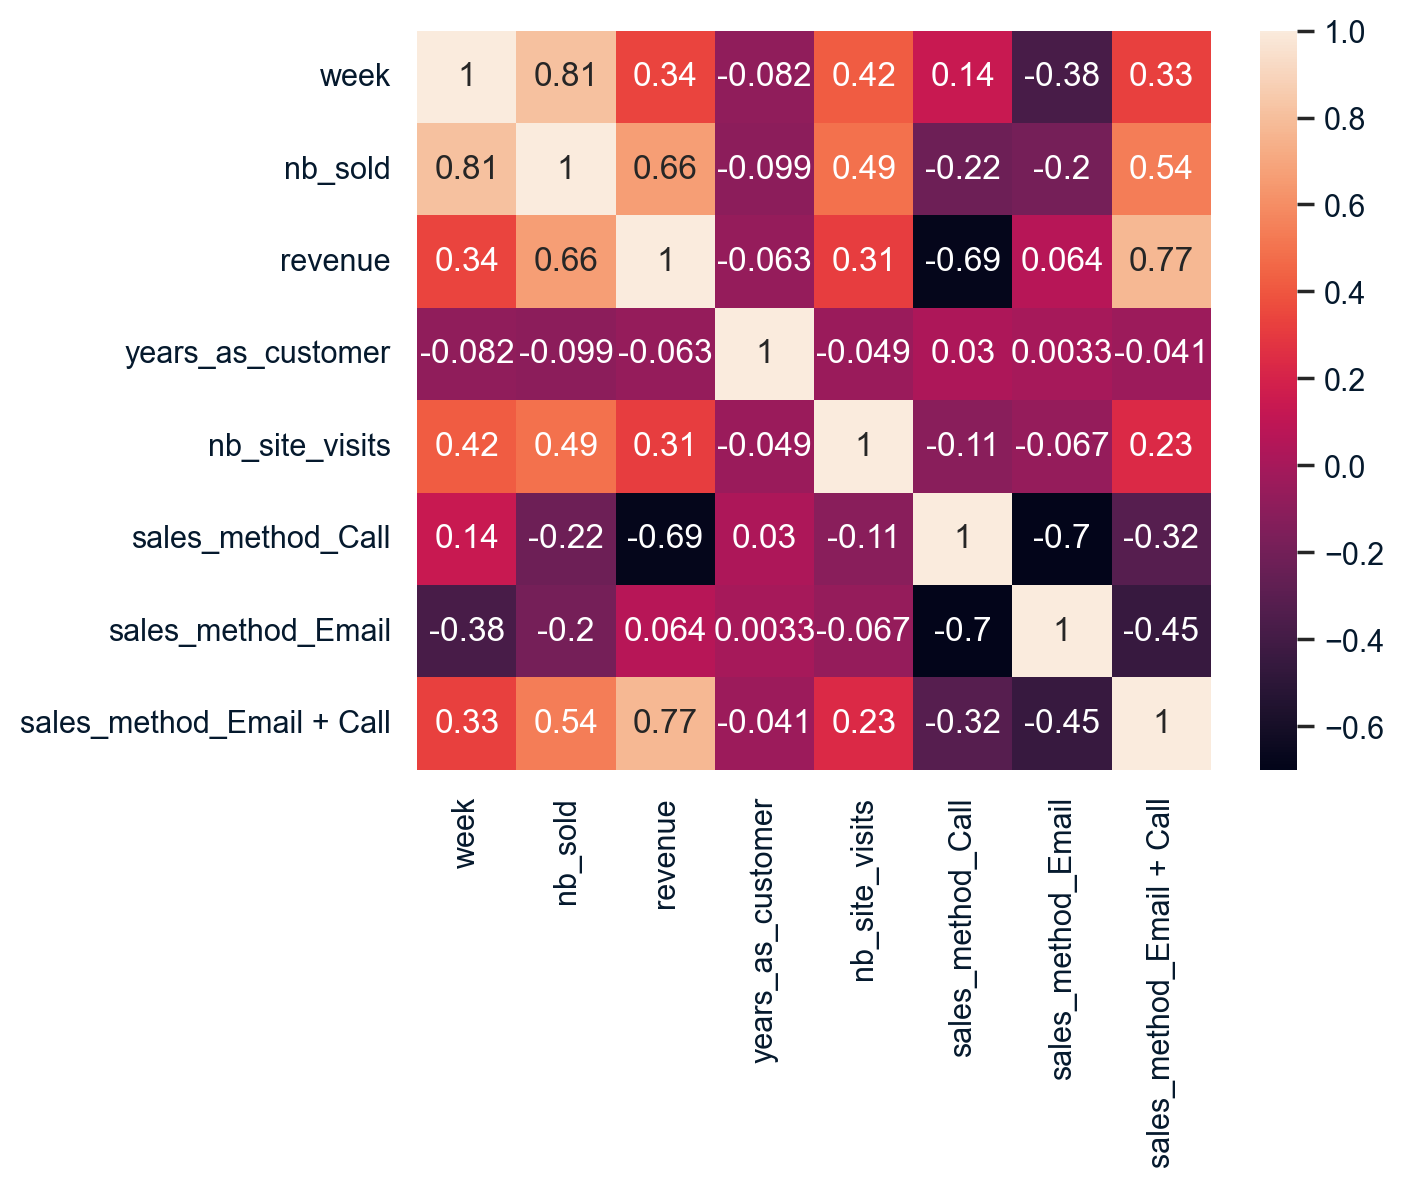

In [129]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

# Business metric: Average Revenue per Sales Method

In [130]:
convertion = sales['revenue'].mean()
convertion

93.92870533333334

In [131]:
conversion_rate_by_method = sales.groupby('sales_method')['revenue'].mean()
conversion_rate_by_method

sales_method
Call             49.293003
Email            96.885968
Email + Call    171.457255
Name: revenue, dtype: float64

# Conclusion

### Recommendations


* Prioritize High-ARSM States & Methods:
Focus marketing and sales resources on states where Email + Call achieves the highest ARSM.

* Optimize Cost vs. Revenue:
If budget is constrained, consider scaling Email in cost-sensitive markets, and Email + Call in high-value markets.

* Refine Hybrid Campaigns:
Since hybrid (Email + Call) performs best, test variations in call timing, email frequency, and sequencing to further lift revenue.

* Track ARSM Continuously:
Monitor the ARSM metric over time to assess campaign effectiveness and detect shifts in customer behavior.

* Regional Strategy Development:
Adapt sales methods to regional preferences — what works best in top-performing states may differ from lower-performing ones.